## Standard (Fully Connected) Neural Network

![title](img/fully_connected.png)

In [ ]:
#Use in Markup cell type
#![alt text](imagename.png "Title")

### Fully connected Neural Net for Hand-written Digit Recognition

#### Loading Required packages and Data

In [1]:
###1. Load Data and Splot Data
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("X_train shape: {} \n Y_train shape:{}".format(X_train.shape, Y_train.shape))
print("X_test shape: {} \n Y_test shape:{}".format(X_test.shape, Y_test.shape))

Using TensorFlow backend.


X_train shape: (60000, 28, 28) 
 Y_train shape:(60000,)
X_test shape: (10000, 28, 28) 
 Y_test shape:(10000,)


#### Preprocessing

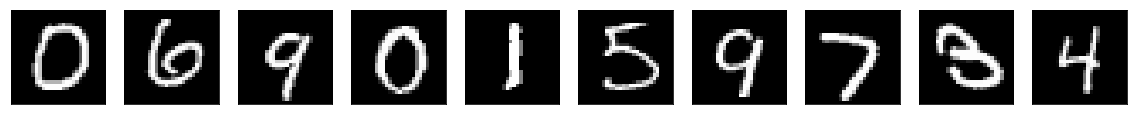

In [2]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(10,n+10):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [3]:
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes)
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape, Y_train.shape))

New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


#### Setting up parameters

In [4]:
input_size = 784
batch_size = 256   
hidden1 = 50
hidden2 = 20
epochs = 10

#### Building the FCN Model

In [5]:
###4.Build the model
model = Sequential()     
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu (dot (W, input) + bias)
model.add(Dense(hidden2, activation='relu')) 
model.add(Dense(classes, activation='softmax')) 

# Compilation
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='sgd')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


#### Training The Model

In [6]:
# Fitting on Data
from time import time
tic = time()
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=2)
toc = time ()
print ("Model Training took {} ms".format((toc-tic)*100))
###5.Test 

Epoch 1/10
2s - loss: 1.8551 - acc: 0.4382
Epoch 2/10
1s - loss: 1.0571 - acc: 0.7305
Epoch 3/10
1s - loss: 0.7242 - acc: 0.8061
Epoch 4/10
1s - loss: 0.5835 - acc: 0.8397
Epoch 5/10
1s - loss: 0.5020 - acc: 0.8614
Epoch 6/10
1s - loss: 0.4481 - acc: 0.8766
Epoch 7/10
1s - loss: 0.4103 - acc: 0.8857
Epoch 8/10
1s - loss: 0.3833 - acc: 0.8922
Epoch 9/10
1s - loss: 0.3625 - acc: 0.8977
Epoch 10/10
1s - loss: 0.3462 - acc: 0.9020
Model Training took 1672.1489906311035 ms


#### Testing The Model

 9536/10000 [===========================>..] - ETA: 0s
Test accuracy: 0.9066
10/10 [==============================] - 0s
[9 6 6 5 4 0 7 4 0 1]


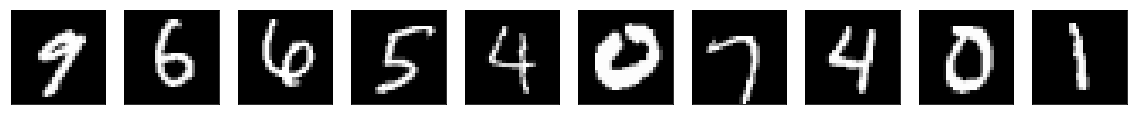

In [7]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])
mask = range(20,30)
X_valid = X_test[mask]
y_pred = model.predict_classes(X_valid)
print(y_pred)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()